In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, FancyBboxPatch
from graph import NULL, CIRCLE, ARROW, TAIL
from tigramite import plotting as tp
import numpy as np

# Read the .dot file into a NetworkX graph
G = nx.nx_pydot.read_dot("monetary-shock-tsfci.dot")

# Inspect nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
Edges: [('1', '16'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6'), ('2', '7'), ('2', '10'), ('2', '18'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('3', '11'), ('3', '19'), ('4', '5'), ('4', '6'), ('4', '7'), ('4', '8'), ('4', '12'), ('4', '20'), ('4', '28'), ('5', '6'), ('5', '7'), ('5', '8'), ('5', '12'), ('5', '13'), ('5', '21'), ('6', '7'), ('6', '8'), ('6', '10'), ('6', '14'), ('6', '22'), ('7', '15'), ('7', '23'), ('8', '13'), ('8', '16'), ('8', '20'), ('8', '21'), ('8', '24'), ('8', '28'), ('8', '29'), ('9', '24'), ('10', '18'), ('10', '26'), ('11', '19'), ('11', '27'), ('12', '20'), ('13', '16'), ('13', '21'), ('13', '29'), ('14', '22'), ('14', '30'), ('15', '23'), ('15', '31'), ('16', '24'), ('16', '32'), ('17', '32'), ('18', '26'), ('19', '27'), ('20', '28'), ('21', '2

In [17]:
TAIL_MAP  = { 'odot': '-', 'normal': '-', 'dot': 'o', 'none': '' }
HEAD_MAP  = { 'odot': '-', 'normal': '>', 'dot': 'o', 'none': '' }

def nx_pag_to_tigramite(G, labels):

    num_labels = len(labels)
    p_nodes = len(G.nodes())
    max_lag = p_nodes // num_labels - 1

    N = num_labels
    graph = np.full((N, N, max_lag + 1), '', dtype='<U4')

    idx_map = {node: int(node) - 1 for node in G.nodes()}

    for u, v, data in G.edges(data=True):
        iu = idx_map[u]
        iv = idx_map[v]

        var_u = iu % num_labels
        var_v = iv % num_labels

        lag_u = iu // num_labels
        lag_v = iv // num_labels

        tau = lag_v - lag_u
        if tau < 0:
            # remove illegal future to past nodes
            continue

        arrowtail = data.get('arrowtail', 'none')
        arrowhead = data.get('arrowhead', 'none')

        left  = TAIL_MAP.get(arrowtail, '')
        right = HEAD_MAP.get(arrowhead, '')

        pattern = f"{left}-{right}"

        #Fix directed edges 
        if tau == 0:
            if pattern in ("->", "-->", "<--", "- >", "> -"):
                pattern = "--"
                reverse = "--"
            else:
                reverse = pattern
        else:
            reverse = None

        graph[var_u, var_v, tau] = pattern

        if tau == 0:
            graph[var_v, var_u, 0] = reverse

    return graph, max_lag

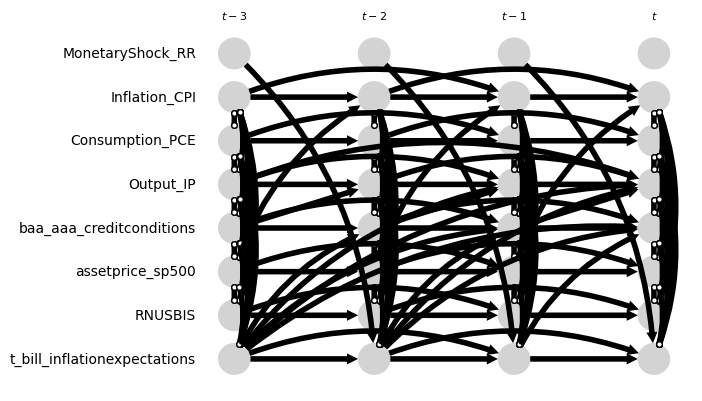

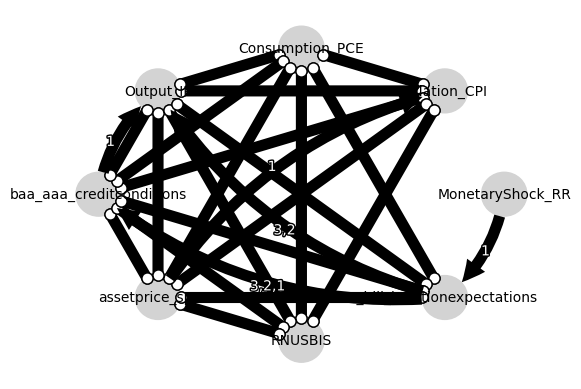

In [ ]:
labels = [
    "MonetaryShock_RR",
    "Inflation_CPI",
    "Consumption_PCE",
    "Output_IP",
    "baa_aaa_creditconditions",
    "assetprice_sp500",
    "RNUSBIS",
    "t_bill_inflationexpectations",
]

graph, tau_max = nx_pag_to_tigramite(G, labels)

from tigramite.plotting import plot_time_series_graph



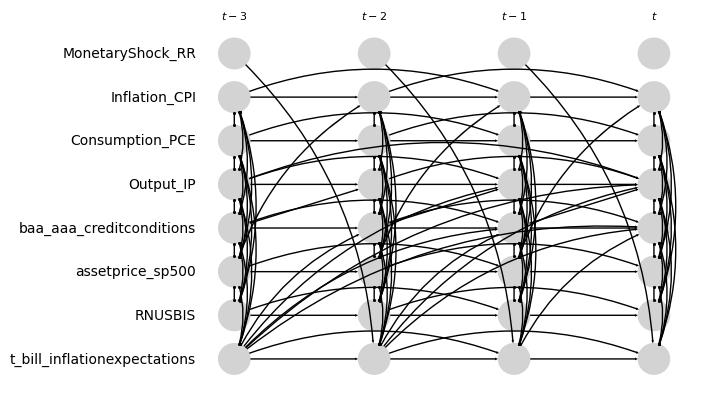

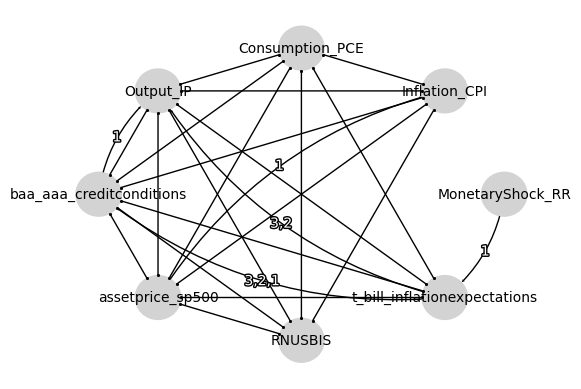

In [16]:
plot_time_series_graph(
    graph=graph,
    var_names=labels, arrow_linewidth=1,
)

tp.plot_graph(graph=graph,
    var_names=labels,arrow_linewidth=1)
plt.show()